In [14]:
from sklearn.datasets import make_blobs
from sklearn.manifold import MDS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys

import umap

import distinctipy

sys.path.append('../../')
from utils import clustering_utils, rna_seq_utils, bokeh_ui_utils

In [ ]:
X, y = make_blobs(n_samples=10000, centers=3, n_features=10, random_state=0)
print(X.shape)

In [ ]:
X_dist = clustering_utils.compute_pairwise_distance_matrix(X, 'manhattan')

In [ ]:
mds_mapper = MDS(n_components=2, normalized_stress='auto', dissimilarity='precomputed', n_jobs=-1)
embedding = mds_mapper.fit_transform(X_dist)

umap_df = pd.DataFrame(np.array(embedding), columns=('x', 'y'))

In [ ]:
umap_df

In [ ]:
plt.scatter(umap_df['x'], umap_df['y'])

In [2]:
full_filtered_df = pd.read_csv('../../active_fastas/rna_seq.csv')
full_filtered_norm_df = rna_seq_utils.normalize_expression_per_gene(full_filtered_df)

leiden_label_df_round_1_arranged_sorted = pd.read_csv('./rna_seq_label_df_round_1.csv')

In [3]:
leiden_label_df_round_1_arranged_sorted.sample(10)

,TTHERM_ID,label
17915,YF00035886.t1,100
18558,YF00021992.t1,85
17117,YF00019757.t1,121
18098,YF00006754.t1,97
18203,YF00036200.t1,94
21376,YF00032622.t1,4
16931,YF00026021.t1,126
4268,YF00024666.t1,474
9137,YF00013646.t1,340
1633,YF00029267.t1,551


In [4]:
full_filtered_norm_df.sample(10)

,TTHERM_ID,000min_A,000min_B,030min_A,030min_B,060min_A,060min_B,090min_A,090min_B,120min_A,120min_B,150min_A,150min_B,180min_A,180min_B,210min_A,210min_B,240min_A,240min_B
16478,YF00025399.t1,1.260231,-2.238924,1.102220,-1.644128,-0.962383,-1.865468,0.296010,-0.233106,0.915684,0.221749,0.932733,0.013974,0.355892,0.529755,0.168132,0.829991,0.150322,0.167314
10024,YF00015657.t1,0.504780,1.834748,-0.018562,1.549458,-0.762662,1.044270,-1.002641,0.674788,-0.589232,0.965443,-1.023635,1.139367,-1.296186,0.276079,-1.432748,-0.541817,-1.009957,-0.311492
4475,YF00006498.t1,2.390156,-0.929966,0.640513,-0.019942,1.530119,-0.096201,0.193521,-1.256497,0.441040,-0.487573,1.266018,-0.819965,0.615090,-1.251678,0.321436,-0.600192,-1.133954,-0.801926
2780,YF00004131.t1,2.032962,1.187717,-0.116362,1.730364,-1.738039,-0.009462,-1.724603,-0.105212,-0.900132,-0.536463,-0.846868,-0.503698,-0.121482,-0.383838,0.594959,0.156867,0.710511,0.572776
1675,YF00002248.t1,0.536746,-0.491982,-0.414237,0.221595,-0.989504,-0.683043,-1.786510,-0.691805,-0.695684,0.033819,1.829762,-0.069153,2.420834,0.707691,-0.125829,0.719143,-1.056196,0.534355
3541,YF00005260.t1,2.272250,0.621626,-1.541445,-0.821698,-1.496500,-0.189741,-1.712026,-0.767644,-0.569070,0.241510,-0.020040,0.208617,1.020949,-0.090783,0.873313,0.697802,0.453399,0.819482
13960,YF00021754.t1,1.341593,2.479626,-1.472323,0.475330,-1.195095,0.351107,-1.072016,0.282022,-1.120131,-0.612254,-0.744995,1.381243,-0.419406,0.612343,-0.458305,0.107602,-0.041353,0.105013
10858,YF00017040.t1,-1.436855,-0.544330,0.034765,-0.928615,-0.392420,0.988869,0.249967,0.934826,0.233489,2.829798,-1.436855,-0.024351,0.050151,-0.937664,0.506053,-0.909887,0.783737,-0.000677
15299,YF00023799.t1,-0.202717,1.522745,-0.216507,1.554645,-0.655648,1.045169,-0.960558,0.919100,-0.297382,1.120083,-1.263095,1.316462,-1.078736,0.277379,-1.807531,-0.181675,-0.743930,-0.347803
969,YF00001334.t1,-2.215633,-1.186551,-1.260212,0.208627,-0.671795,0.663499,0.210839,0.937152,0.992817,1.395173,0.788111,1.516450,-0.153245,0.864994,-1.007254,-0.049693,-0.692234,-0.341045


In [5]:
leiden_label_df_round_1_arranged_sorted.loc[leiden_label_df_round_1_arranged_sorted['label'] == 24]['TTHERM_ID'].values

array(['YF00036141.t1', 'YF00028683.t1', 'YF00028631.t1', 'YF00027779.t1',
       'YF00027089.t1', 'YF00027066.t1', 'YF00026998.t1', 'YF00026535.t1',
       'YF00026368.t1', 'YF00026296.t1', 'YF00024741.t1', 'YF00024626.t1',
       'YF00023806.t1', 'YF00023251.t1', 'YF00023037.t1', 'YF00023006.t1',
       'YF00022947.t1', 'YF00021738.t1', 'YF00021385.t1', 'YF00020283.t1',
       'YF00020192.t1', 'YF00020176.t1', 'YF00019953.t1', 'YF00019698.t1',
       'YF00018307.t1', 'YF00018010.t1', 'YF00017830.t1', 'YF00017824.t1',
       'YF00017767.t1', 'YF00017609.t1', 'YF00017155.t1', 'YF00016102.t1',
       'YF00014356.t1', 'YF00013371.t1', 'YF00013213.t1', 'YF00012996.t1',
       'YF00012926.t1', 'YF00012743.t1', 'YF00012163.t1', 'YF00011066.t1',
       'YF00009165.t1', 'YF00005977.t1', 'YF00005838.t1', 'YF00005494.t1',
       'YF00005377.t1', 'YF00004693.t1', 'YF00004320.t1', 'YF00003613.t1',
       'YF00003095.t1', 'YF00002743.t1', 'YF00002286.t1', 'YF00002209.t1',
       'YF00002091.t1', '

In [6]:
avg_df = None

for m in leiden_label_df_round_1_arranged_sorted['label'].unique():

    curr_df = (full_filtered_norm_df.loc[full_filtered_norm_df['TTHERM_ID'].isin(
                    (leiden_label_df_round_1_arranged_sorted.loc[leiden_label_df_round_1_arranged_sorted['label'] == m]['TTHERM_ID'].values)
                )].iloc[:, 1:].mean()).to_frame().T
    curr_df['label'] = m

    if avg_df is None:
        avg_df = curr_df
        continue

    avg_df = pd.concat((avg_df, curr_df), ignore_index=True)

avg_df = avg_df.loc[: , list(avg_df.columns)[avg_df.shape[1] - 1:] + list(avg_df.columns)[0: avg_df.shape[1] - 1]]

In [7]:
avg_df

,label,000min_A,000min_B,030min_A,030min_B,060min_A,060min_B,090min_A,090min_B,120min_A,120min_B,150min_A,150min_B,180min_A,180min_B,210min_A,210min_B,240min_A,240min_B
0,595,-0.957573,-0.210519,-1.166477,-0.120825,-1.214675,0.018263,-0.726302,0.355191,-0.635925,0.752588,-0.255345,0.809415,-0.276438,0.812581,-0.028073,1.297328,0.140374,1.406414
1,594,-2.277105,-0.326110,-1.343040,0.363712,-0.694826,0.826624,-0.429789,0.840412,-0.478447,0.982469,-0.541513,0.742839,-0.325439,0.765131,0.204115,0.569166,0.321192,0.800609
2,593,-2.139829,0.773537,-1.811944,0.527521,-0.804285,0.920164,-0.470186,0.819089,-0.236812,0.711567,0.013265,1.408108,0.062882,0.373229,0.035427,-0.061259,-0.168969,0.048495
3,592,-2.740562,0.230467,-0.233834,0.297393,0.023092,0.601173,-0.182532,0.234996,0.245627,0.304981,0.568383,1.569188,0.295990,0.590616,-0.467213,0.031254,-1.045370,-0.323649
4,591,-1.620516,-0.669060,-1.023764,0.078261,-1.050723,0.385144,-1.017579,0.309205,-0.199297,0.575829,0.510237,1.470327,0.902481,1.070745,-0.028918,0.877223,-0.925915,0.356319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,4,-1.635019,-1.291347,1.610431,0.843181,1.125032,0.648951,0.497074,0.219219,0.105099,0.079673,-0.361516,-0.281059,-0.786753,-0.406745,-0.220960,-0.404203,0.459423,-0.200480
592,3,-1.506978,-1.683740,1.329933,0.504283,1.611052,0.582359,1.047842,0.207516,0.591366,0.005102,-0.067880,-0.500786,-0.775381,-0.675306,-0.275337,-0.650535,0.517910,-0.261421
593,2,-1.434741,-1.041470,0.281113,0.047484,1.409130,0.914097,1.251733,0.787974,0.849110,0.505683,-0.204595,0.115648,-1.237827,-0.598295,-0.589493,-0.654806,0.078509,-0.479254
594,1,-0.461121,-1.189011,0.140955,-0.096966,1.245195,0.246047,1.474566,0.142255,0.946458,-0.313149,0.438196,-0.746943,-0.473081,-0.564430,-0.186868,-0.468119,0.105584,-0.239569


In [8]:
data = full_filtered_norm_df[list(full_filtered_norm_df.columns)[1:]].values

random_state = 42
n_components = 2
n_neighbors = 3
embedding_metric = 'manhattan'

umap_mapper = umap.UMAP(random_state=random_state, n_components=n_components, n_neighbors=n_neighbors, metric=embedding_metric).fit(data)
embedding = bokeh_ui_utils._get_umap_embedding(umap_mapper)

umap_df = pd.DataFrame(np.array(embedding), columns=('x', 'y'))

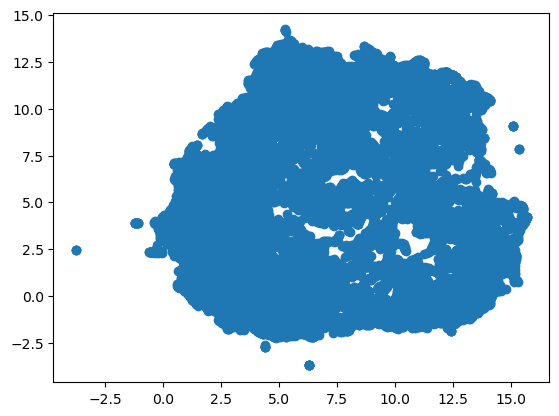

In [9]:
plt.scatter(umap_df['x'], umap_df['y'])

In [21]:
data = avg_df[list(avg_df.columns)[1:]].values

random_state = 42
n_components = 2
n_neighbors = 3
embedding_metric = 'manhattan'

umap_mapper = umap.UMAP(random_state=random_state, n_components=n_components, n_neighbors=n_neighbors, metric=embedding_metric).fit(data)
embedding = bokeh_ui_utils._get_umap_embedding(umap_mapper)

umap_df = pd.DataFrame(np.array(embedding), columns=('x', 'y'))

umap_df['label'] = [str(l) for l in avg_df['label'].values]

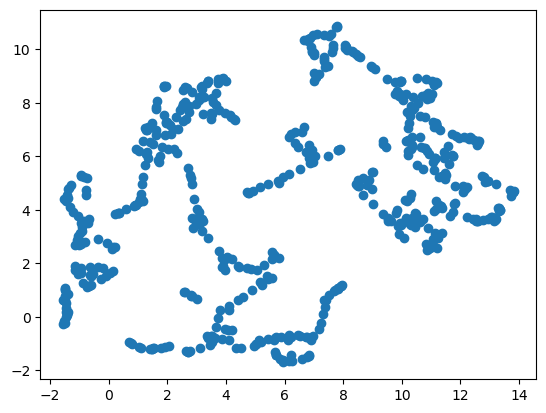

In [22]:
plt.scatter(umap_df['x'], umap_df['y'])

In [23]:
def rgb_to_hex(rgb):
    """
    Convert RGB tuple to hexadecimal color code.
    """
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

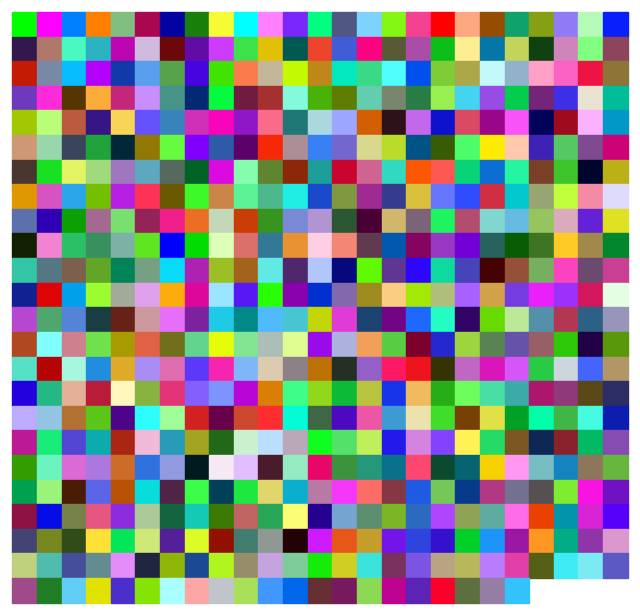

In [24]:
num_colors = len(umap_df['label'].unique())
colors = distinctipy.get_colors(num_colors)
distinctipy.color_swatch(colors)
metric_colors_dict = {m : rgb_to_hex(colors[idx]) for idx, m in enumerate(umap_df['label'].unique())}

In [27]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

bokeh_x = 'x'
bokeh_y = 'y'
# bokeh_y = 'fraction_clusters_enriched'
color_column = 'label'  # Column to use for coloring the points

axis_padding = 0.05
x_min, x_max = umap_df[bokeh_x].min() - axis_padding * umap_df[bokeh_x].min(), umap_df[bokeh_x].max() + axis_padding * umap_df[bokeh_x].max()
y_min, y_max = umap_df[bokeh_y].min() - axis_padding * umap_df[bokeh_y].min(), umap_df[bokeh_y].max() + axis_padding * umap_df[bokeh_y].max()

p = figure(title='', sizing_mode='stretch_both', x_range=(x_min, x_max), y_range=(y_min, y_max))

for val in sorted(umap_df[color_column].unique()):
    col_df=umap_df.loc[(umap_df[color_column]==val)]
    p.scatter(bokeh_x, bokeh_y, size=3, color=metric_colors_dict[val], 
            #   legend_label=val, 
              source=col_df)

tooltips = []
for column in col_df.columns[col_df.shape[1] - 1:]:
    tooltip = (column.replace('_', ' ').title(), f'@{column}')
    tooltips.append(tooltip)

hover = HoverTool(tooltips=tooltips)

p.add_tools(hover)

# p.legend.click_policy="hide"
# p.legend.location = "bottom_left"

p.xaxis.axis_label = bokeh_x
p.yaxis.axis_label = bokeh_y

p.min_border = 100

show(p)